# SALARY PREDICTION

### IMPORTS 

In [12]:
import pandas as pd
import numpy as np 

### LOADING DATASET

In [16]:
data = pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### ABOUT DATASET

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## EDA 

#### Salary distribution

In [20]:
import matplotlib.pyplot as plt

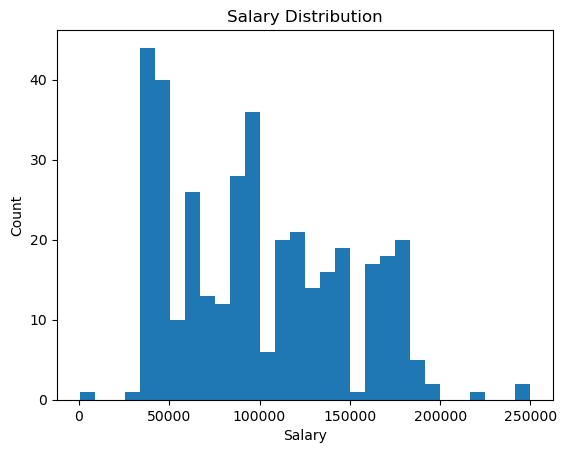

In [22]:
plt.figure()
plt.hist(data["Salary"], bins=30)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Salary Distribution")
plt.show()

Shows how salaries are spread and highlights skewness and outliers.

#### Experience vs Salary

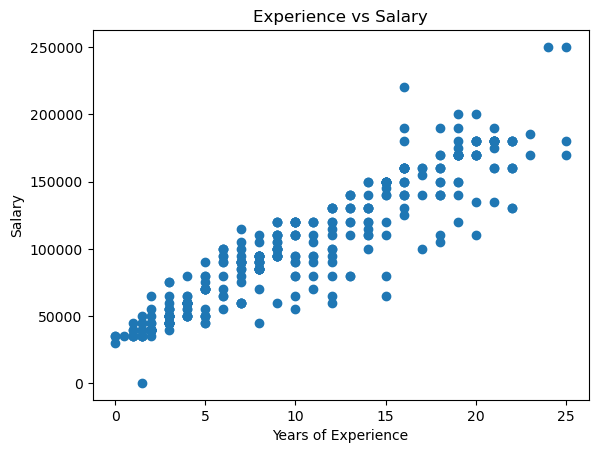

In [23]:
plt.figure()
plt.scatter(data["Years of Experience"], data["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()


Checks the relationship between experience and salary. Used to see if salary increases with experience.

#### Age vs Salary

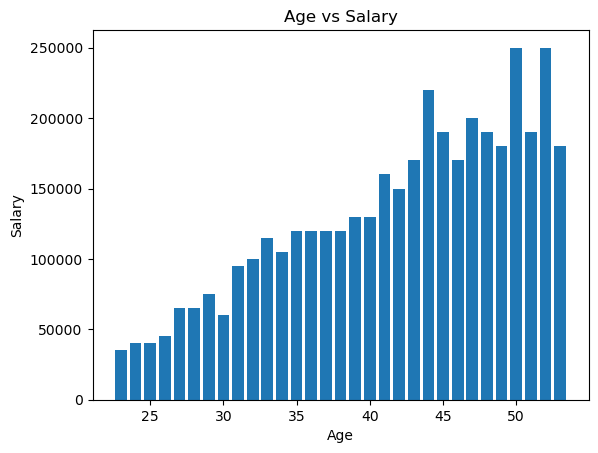

In [28]:
plt.figure()
plt.bar(data["Age"], data["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

Analyzes whether age directly impacts salary. Helps compare age vs experience importance.

#### Salary by Education Level

<Figure size 640x480 with 0 Axes>

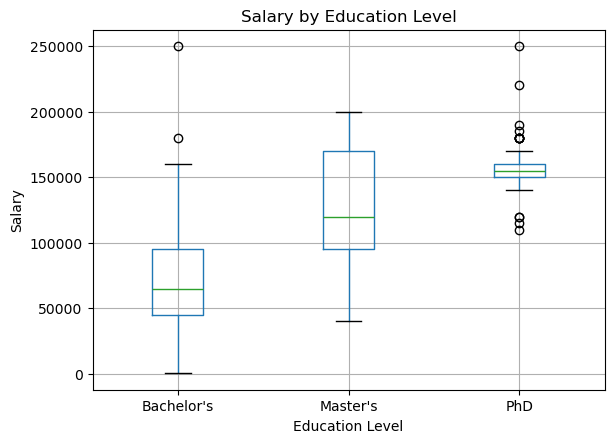

In [29]:
plt.figure()
data.boxplot(column="Salary", by="Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.title("Salary by Education Level")
plt.suptitle("")
plt.show()


Compares salary distribution across education levels and shows median and outliers.

#### Salary by Gender

<Figure size 640x480 with 0 Axes>

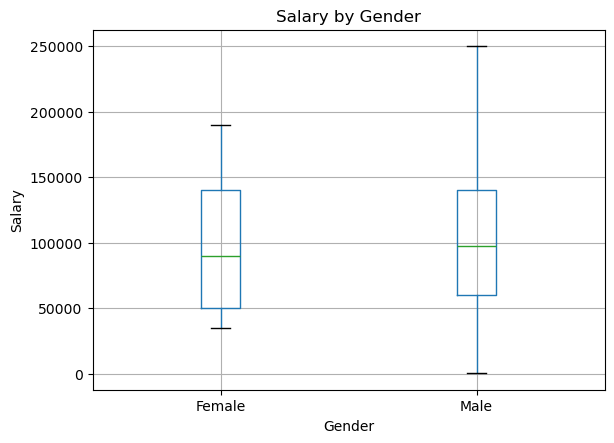

In [30]:
plt.figure()
data.boxplot(column="Salary", by="Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Salary by Gender")
plt.suptitle("")
plt.show()


Checks if salary differences exist between genders.

#### Salary by Job Title

<Figure size 640x480 with 0 Axes>

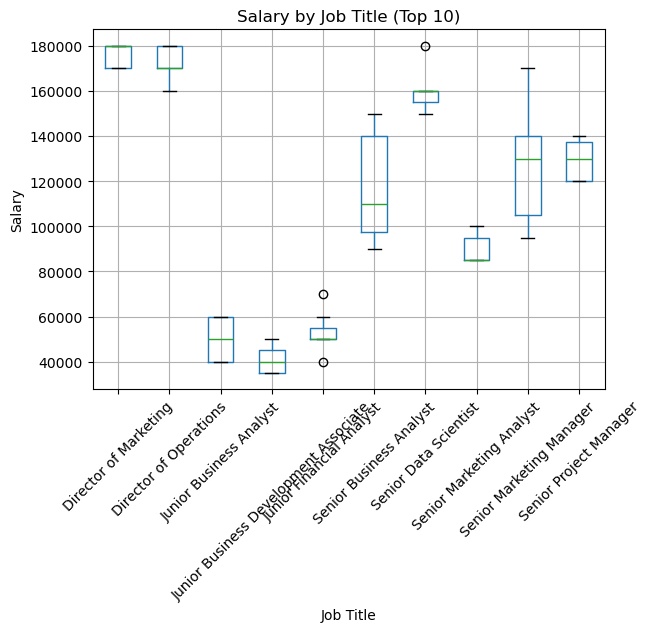

In [32]:
top_jobs = data["Job Title"].value_counts().head(10).index
data_top = data[data["Job Title"].isin(top_jobs)]

plt.figure()
data_top.boxplot(column="Salary", by="Job Title", rot=45)
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.title("Salary by Job Title (Top 10)")
plt.suptitle("")
plt.show()


Analyzes salary variation across the most common job roles.

#### Correlation Matrix

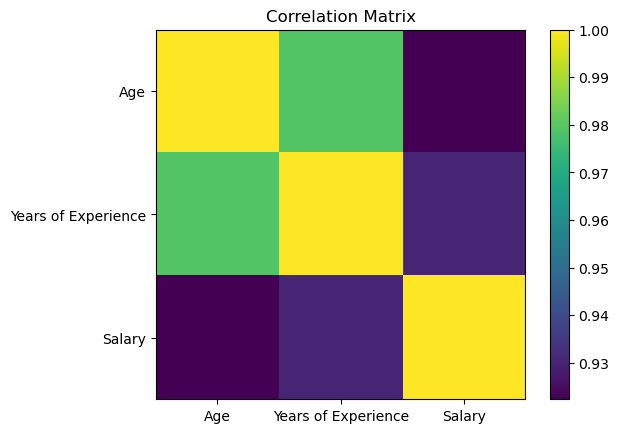

In [33]:
corr = data[["Age", "Years of Experience", "Salary"]].corr()

plt.figure()
plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


Shows strength and direction of relationships between numerical variables.

#### Seniority Analysis

<Figure size 640x480 with 0 Axes>

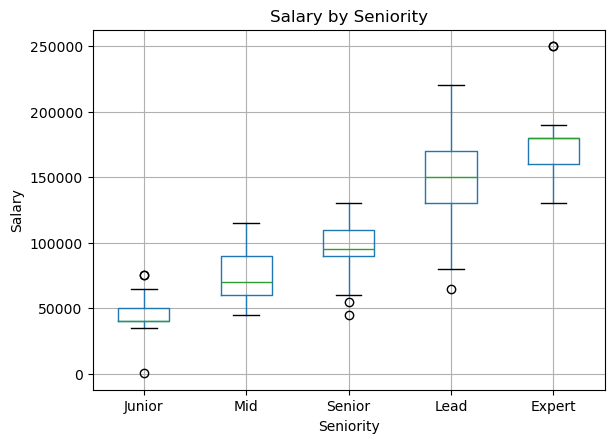

In [35]:
bins = [0, 3, 7, 12, 20, 30]
labels = ["Junior", "Mid", "Senior", "Lead", "Expert"]

data["Seniority"] = pd.cut(data["Years of Experience"], bins=bins, labels=labels)

plt.figure()
data.boxplot(column="Salary", by="Seniority")
plt.xlabel("Seniority")
plt.ylabel("Salary")
plt.title("Salary by Seniority")
plt.suptitle("")
plt.show()


Groups employees by experience level to analyze salary growth across career stages.

### EDA Summary 

Salary is right-skewed

Experience is the strongest predictor

Education level has clear salary impact

Job title adds noise unless grouped

Minor missing data, easy cleanup

One obvious salary anomaly

In [36]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


###                                                                MODEL BUILDING

In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [61]:
X = df[["Age", "Years of Experience", "Education Level", "Gender", "Job Title"]]
y = df["Salary"]


In [ ]:
X = pd.get_dummies(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### MODEL 1 — LINEAR REGRESSION

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [69]:
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
lr_train_r2 = lr.score(X_train, y_train)
lr_test_r2 = lr.score(X_test, y_test)

lr_train_r2, lr_test_r2

(0.9859113570193959, 0.8917813532868547)

### MODEL 2 — DECISION TREE REGRESSOR

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt = DecisionTreeRegressor(random_state=42)

In [73]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
dt_train_r2 = dt.score(X_train, y_train)
dt_test_r2 = dt.score(X_test, y_test)

dt_train_r2, dt_test_r2

(1.0, 0.8480999816044094)

 ### MODEL 3 — RANDOM FOREST REGRESSOR

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

In [77]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [78]:
rf_train_r2 = rf.score(X_train, y_train)
rf_test_r2 = rf.score(X_test, y_test)

rf_train_r2, rf_test_r2

(0.9854693472944228, 0.8816479925773164)

### MODEL 4 — GRADIENT BOOSTING REGRESSOR

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
gb = GradientBoostingRegressor(random_state=42)


In [98]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [100]:
gb_train_r2 = gb.score(X_train, y_train)
gb_test_r2 = gb.score(X_test, y_test)

gb_train_r2, gb_test_r2

(0.972160759792807, 0.8899747049735711)

In [101]:
summary = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "Train R2": [
        lr_train_r2,
        dt_train_r2,
        rf_train_r2,
        gb_train_r2
    ],
    "Test R2": [
        lr_test_r2,
        dt_test_r2,
        rf_test_r2,
        gb_test_r2
    ]
})

summary



,Model,Train R2,Test R2
0,Linear Regression,0.985911,0.891781
1,Decision Tree,1.000000,0.848100
2,Random Forest,0.985469,0.881648
3,Gradient Boosting,0.972161,0.889975


## MODEL TUNING 

#### GRADIENT BOOSTING TUNING

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [103]:
gb = GradientBoostingRegressor(random_state=42)

In [104]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3, 4],
    "min_samples_leaf": [1, 3, 5]
}

In [105]:
grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

In [106]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [107]:
grid_gb.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [108]:
best_gb = grid_gb.best_estimator_

gb_train_r2 = best_gb.score(X_train, y_train)
gb_test_r2 = best_gb.score(X_test, y_test)

gb_train_r2, gb_test_r2

(0.9540356671610548, 0.8866548781039273)

### RANDOM FOREST TUNING

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [110]:
rf = RandomForestRegressor(random_state=42)

In [111]:
param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

In [112]:
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

In [113]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='r2')

In [114]:
best_rf = grid_rf.best_estimator_

rf_train_r2 = best_rf.score(X_train, y_train)
rf_test_r2 = best_rf.score(X_test, y_test)

rf_train_r2, rf_test_r2

(0.9471441319120105, 0.8787498063557933)